# Visualisation

In [1]:
import importlib

# List of libraries to check
libraries = [
    'numpy',
    'matplotlib',
    'scipy',
    'torch',
    'torchdiffeq',
    'torchsummary',
    'minepy',
    'pyrqa',
    'pyts',
    'MFDFA',
    'pyinform',
    'graphviz',
    'fa2',
    'networkx'
]

for lib in libraries:
    try:
        module = importlib.import_module(lib)
        version = getattr(module, '__version__', 'Unknown version')
        print(f'{lib}: {version}')
    except ImportError:
        print(f'{lib} is not installed.')

numpy: 1.24.3
matplotlib: 3.7.0
scipy: 1.10.1
torch: 2.0.1+cu117
torchdiffeq: 0.2.3
torchsummary: Unknown version
minepy: b'1.2.6'
pyrqa: Unknown version
pyts: 0.12.0
MFDFA: 0.4.3
pyinform: Unknown version
graphviz: 0.20.1
fa2 is not installed.
networkx: 3.0


Here we are visualising the data in different ways

In [2]:
import numpy as np
import nolds
import scipy.io
import mne
import pandas as pd
import seaborn as sns
import pyqtgraph as pg
from scipy.io import loadmat
from scipy import stats
import matplotlib.pyplot as plt
import antropy as ent
from antropy import higuchi_fd
from pyrqa.settings import Settings
from pyrqa.neighbourhood import FixedRadius
from pyrqa.computation import RQAComputation
from pyrqa.time_series import TimeSeries
from pyrqa.result import RQAResult
from pyrqa.opencl import OpenCL
from pyrqa.settings import Settings
from pyrqa.time_series import TimeSeries
from pyrqa.neighbourhood import FixedRadius
from pyrqa.settings import Settings
from pyrqa.time_series import TimeSeries
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
from pyrqa.settings import Settings
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.image_generator import ImageGenerator
import numpy as np
import matplotlib.pyplot as plt
from antropy import higuchi_fd
import os

/home/vincent/miniconda3/lib/python3.10/site-packages/antropy/fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit((types.Array(types.float64, 1, "C", readonly=True), types.int32))


In [17]:
# Load data from numpy files
autoregressive_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/AutoRegressive_x.npy', allow_pickle=True)
band_power_data_array = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/BandPower_x.npy', allow_pickle=True)
fft_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/combined_fft_psd_x.npy', allow_pickle=True)
lomb_scargle_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/LombScarglePeriodograms_x.npy', allow_pickle=True)
peak_frequencies_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/PeakFrequencies_x.npy', allow_pickle=True)
stft_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/STFT_x.npy', allow_pickle=True)
spectral_centroids_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/SpectralCentroids_x.npy', allow_pickle=True)
spectral_edge_densities_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/SpectralEdgeDensities_x.npy', allow_pickle=True)
spectral_entropy_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/SpectralEntropy_x.npy', allow_pickle=True)
welchs_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/welchs_x.npy', allow_pickle=True)
EEG_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/eeg_data_with_channels.npy', allow_pickle=True)


# Print the shape of each dataset
print("Autoregressive Data Shape:", autoregressive_data.shape)
print("Band Power Data Shape:", band_power_data.shape)
print("FFT Data Shape:", fft_data.shape)
print("Lomb-Scargle Data Shape:", lomb_scargle_data.shape)
print("Peak Frequencies Data Shape:", peak_frequencies_data.shape)
print("STFT Data Shape:", stft_data.shape)
print("Spectral Centroids Data Shape:", spectral_centroids_data.shape)
print("Spectral Edge Densities Data Shape:", spectral_edge_densities_data.shape)
print("Spectral Entropy Data Shape:", spectral_entropy_data.shape)
print("Welch's Data Shape:", welchs_data.shape)
print("EEG DataFrame Shape:", EEG_data.shape)

Autoregressive Data Shape: (30000,)
Band Power Data Shape: ()
FFT Data Shape: ()
Lomb-Scargle Data Shape: ()
Peak Frequencies Data Shape: ()
STFT Data Shape: ()
Spectral Centroids Data Shape: ()
Spectral Edge Densities Data Shape: ()
Spectral Entropy Data Shape: ()
Welch's Data Shape: (4,)
EEG DataFrame Shape: (4227788, 32)


In [ ]:
import numpy as np

# Load the Welch's PSD data from the .npy file
psd_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/psd_x.npy', allow_pickle=True).item()

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Print the head of the PSD data for each EEG channel
for channel in eeg_channels:
    psd_values = psd_data[channel]
    print(f'PSD values for EEG Channel {channel}:')
    print(psd_values[:10])  # Print the first 10 values of the PSD
    print('---')

IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

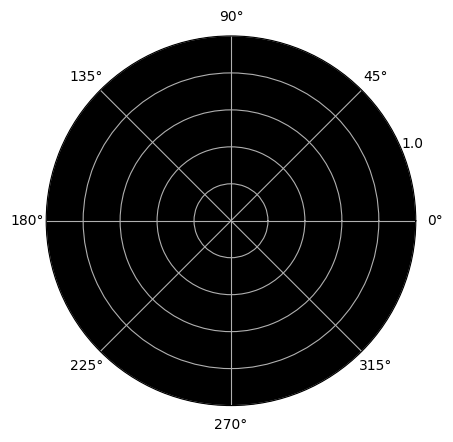

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Get the list of all EEG channel names
eeg_channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2', 'Fpz']

# Create a circular plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_facecolor('black')  # Set black background

# Plot the data for each EEG channel
for channel in eeg_channels:
    # Get the values for the current EEG channel from different analysis data
    values = [
        band_power_data_array[:, eeg_channels.index(channel)],  # Band power data
        autoregressive_data[channel],
        fft_data[channel],
        lomb_scargle_data[channel],
        peak_frequencies_data[channel],
        stft_data[channel],
        spectral_centroids_data[channel],
        spectral_edge_densities_data[channel],
        spectral_entropy_data[channel],
        welchs_data[channel],
    ]

    # Plot the data as a polar plot
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False)
    values = np.concatenate((values, [values[0]]))  # Close the plot
    angles = np.concatenate((angles, [angles[0]]))  # Close the plot
    ax.plot(angles, values, linewidth=2, label=channel)

# Customize the appearance of the plot (colors, line styles, etc.) for the artistic/psychedelic style
# (You can modify the plot appearance to your preference)

# Add labels, titles, or annotations if needed

# Add a legend to the plot
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

# Save the plot as an image file
plt.savefig("circular_plot.png", dpi=300, facecolor='black')

# Show the plot
plt.show()


In [21]:
print(band_power_data_array.shape)


()


In [16]:
print("Shape of autoregressive_data:", autoregressive_data.shape)
print("First value in autoregressive_data:", autoregressive_data[0])


Shape of autoregressive_data: (30000,)
First value in autoregressive_data: -17355.23130181053
